#Testing Gait Cycle Extraction Method

The purpose of this notebook is to test our method for extracting gait cycles to determine how effective it is.

In [2]:
%matplotlib inline
%precision 3
import numpy as np
import scipy
import ReadCsvs as rc
import thinkstats2
import thinkplot
import GaitCycleFunc as gcf

/Users/jpoh/anaconda/lib/python2.7/site-packages/pytz/__init__.py:29: UserWarning: Module argparse was already imported from /Users/jpoh/anaconda/lib/python2.7/argparse.pyc, but /Users/jpoh/anaconda/lib/python2.7/site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [3]:
AFO, PPAFO, Shoes=rc.ReadGaitData()

Sub001_6MW_AFO_0001.mat
Sub001_6MW_AFO_0002.mat
Sub001_6MW_AFO_0003.mat
Sub001_6MW_AFO_0004.mat
Sub001_6MW_AFO_0005.mat
Sub001_6MW_AFO_0006.mat
Sub001_6MW_AFO_0007.mat
Sub001_6MW_AFO_0008.mat
Sub001_6MW_AFO_0009.mat
Sub001_6MW_PPAFO_0001.mat
Sub001_6MW_PPAFO_0002.mat
Sub001_6MW_PPAFO_0003.mat
Sub001_6MW_PPAFO_0004.mat
Sub001_6MW_PPAFO_0005.mat
Sub001_6MW_PPAFO_0006.mat
Sub001_6MW_PPAFO_0007.mat
Sub001_6MW_PPAFO_0008.mat
Sub001_6MW_PPAFO_0009.mat
Sub001_6MW_Shoes_0001.mat
Sub001_6MW_Shoes_0002.mat
Sub001_6MW_Shoes_0003.mat
Sub001_6MW_Shoes_0004.mat
Sub001_6MW_Shoes_0005.mat
Sub001_6MW_Shoes_0006.mat
Sub001_6MW_Shoes_0007.mat
Sub001_6MW_Shoes_0008.mat
Sub001_6MW_Shoes_0009.mat
Sub002_6MW_AFO_0001.mat
Sub002_6MW_AFO_0002.mat
Sub002_6MW_AFO_0003.mat
Sub002_6MW_AFO_0004.mat
Sub002_6MW_AFO_0005.mat
Sub002_6MW_AFO_0006.mat
Sub002_6MW_AFO_0007.mat
Sub002_6MW_AFO_0008.mat
Sub002_6MW_AFO_0009.mat
Sub002_6MW_PPAFO_0001.mat
Sub002_6MW_PPAFO_0002.mat
Sub002_6MW_PPAFO_0003.mat
Sub002_6MW_PPAFO_0004.

###Test Symmetry Based on Gait Cycles

[[276, 10999.286240383261], [492, 11215.618851874468]] [1.575, 2.6550000000000002] [66.203577465921043, 57.334253778630469]


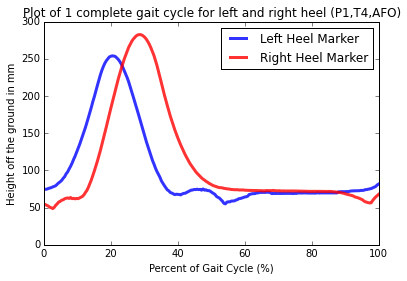

test
[[4, 3742.3576975611745], [222, 9782.8221084470606]] [0.215, 1.3049999999999999] [72.617329345215509, 74.127169807652905]


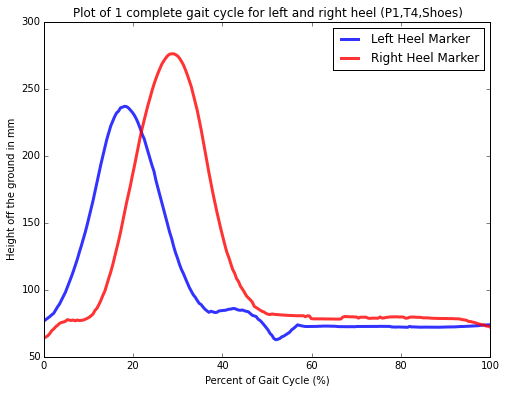

In [24]:
data=[AFO, PPAFO, Shoes]

cycle_set=gcf.CycleExtract('AFO', data, 12, 9, 'z', 'R_HEEL', False, False)

for i in range(len(cycle_set)):
    index, cycle=cycle_set[i]
    lheeldata_afo=cycle['L_HEEL']
    rheeldata_afo=cycle['R_HEEL']
    
    percent=np.linspace(0,100, len(index))


#     print rheeldata
#     rheeldata_rev=rheeldata[::-1]
#     print rheeldata_rev


    thinkplot.Plot(percent, lheeldata_afo, label='Left Heel Marker', color='blue')
    thinkplot.Plot(percent[::-1], rheeldata_afo, label='Right Heel Marker', color='red')
    thinkplot.Show(legend=True, xlabel='Percent of Gait Cycle (%)', ylabel='Height off the ground in mm', title='Plot of 1 complete gait cycle for left and right heel (P1,T4,AFO)')

#################

cycle_set=gcf.CycleExtract('Shoes', data, 12, 9, 'z', 'R_HEEL', False, False)

for i in range(len(cycle_set)):
    index, cycle=cycle_set[i]
    lheeldata_shoes=cycle['L_HEEL']
    rheeldata_shoes=cycle['R_HEEL']
    
    percent=np.linspace(0,100, len(index))


#     print rheeldata
#     rheeldata_rev=rheeldata[::-1]
#     print rheeldata_rev


    thinkplot.Plot(percent, lheeldata_shoes, label='Left Heel Marker', color='blue')
    thinkplot.Plot(percent[::-1], rheeldata_shoes, label='Right Heel Marker', color='red')
    thinkplot.Show(legend=True, xlabel='Percent of Gait Cycle (%)', ylabel='Height off the ground in mm', title='Plot of 1 complete gait cycle for left and right heel (P1,T4,Shoes)')
    


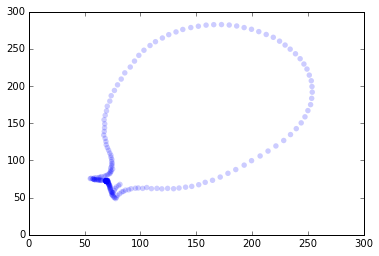

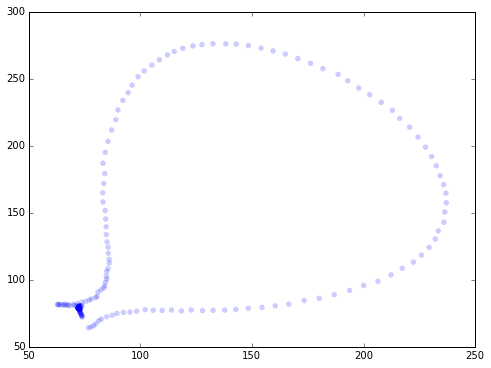

In [34]:
thinkplot.Scatter(lheeldata_afo, rheeldata_afo[::-1], alpha=0.2)
thinkplot.Show()

thinkplot.Scatter(lheeldata_shoes, rheeldata_shoes[::-1], alpha=0.2)
thinkplot.Show()

In [35]:
corr_afo=thinkstats2.Corr(lheeldata_afo, rheeldata_afo[::-1])
corr_shoes=thinkstats2.Corr(lheeldata_shoes, rheeldata_shoes[::-1])

print "AFO Correlation=", corr_afo
print "Shoes Correlation=", corr_shoes

AFO Correlation= 0.610954688192
Shoes Correlation= 0.510221451406
